# Understanding Descriptive Statistics

Import the necessary libraries here:

In [7]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [15]:
# your code here
def dice(x):
    return random.choices([1, 2, 3, 4, 5, 6], k=x)

turn = list(range(1, 11))
turn

dices = pd.DataFrame(list(zip(turn, dice(10))), columns=("Turn", "Result"))
dices

,Turn,Result
0,1,5
1,2,6
2,3,2
3,4,2
4,5,3
5,6,4
6,7,5
7,8,3
8,9,5
9,10,3


#### 2.- Plot the results sorted by value.

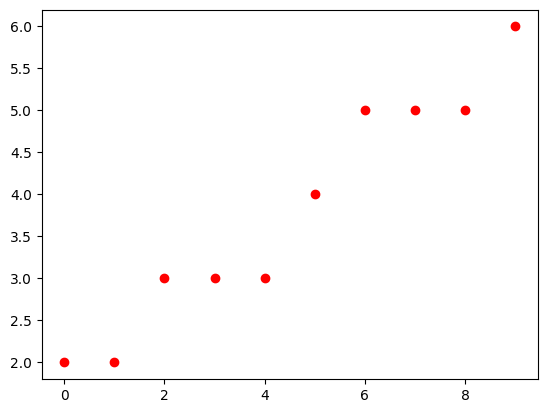

In [20]:
# your code here
plt.plot(dices.sort_values(by=["Result"], ascending=True)["Result"].values, "ro")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

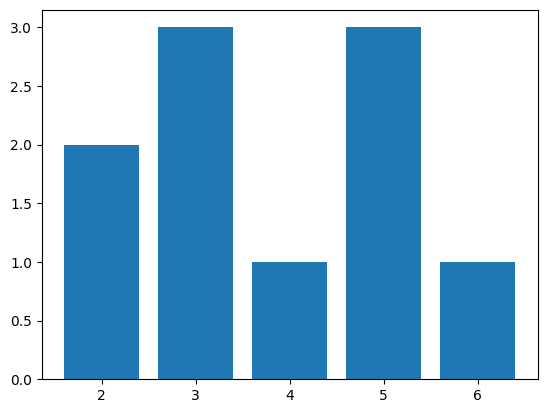

In [25]:
# your code here
dice_freq = (pd.DataFrame(dices["Result"].value_counts()).reset_index())
dice_freq
dice_freq.columns = ["Result", "freq"]
dice_freq
plt.bar(dice_freq["Result"], dice_freq["freq"])
plt.show()

In [26]:
"""
your comments here
In this bar plot you can easily see the frequency/number of every distinct dice, in the other one above they are not grouped and easy recognizable
"""

'\nyour comments here\nIn this bar plot you can easily see the frequency/number of every distinct dice, in the other one above they are not grouped and easy recognizable\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [65]:
# your code here
def mean(x):
    return np.sum(x)/len(x)

mean(dices["Result"])

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
# your code here
dice_res = dices["Result"]
dice_freq = pd.DataFrame(dice_res.value_counts()).reset_index()
dice_freq = dice_freq.rename(columns={"index":"Result", "Result":"Freq"})
dice_freq

,Result,Freq
0,5,3
1,3,3
2,2,2
3,6,1
4,4,1


In [47]:
dice_mean = (dice_freq["Result"] * dice_freq["Freq"]) / sum(dice_freq["Freq"])
sum(dice_mean)

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [48]:
# your code here
def median(x):
    if len(x)%2 == 0:
        return (np.sort(x)[int(len(x)/2)][0] + np.sort(x)[int(len(x)/2)+1][0]) / 2
    else:
        pass
        return (np.sort(x)[(len(x)-1)/2][0])

median(dices)

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [49]:
# your code here
## not needed to do

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

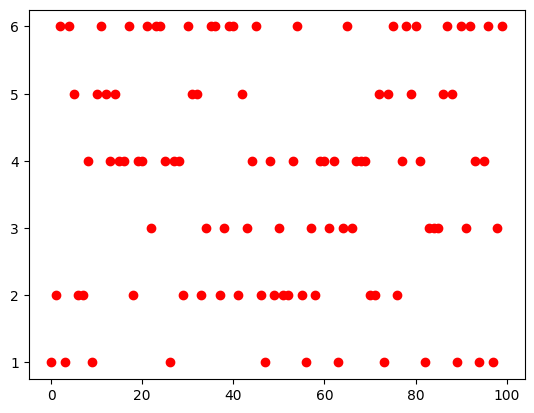

In [75]:
# your code here
dice_hun = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Ironhack\Labs\Descriptive-Stats\data\roll_the_dice_hundred.csv")
dice_hun.sort_values(by="value", ascending=True, inplace=True)
plt.plot(dice_hun["value"], "ro")

In [ ]:
"""
your comments here
the values seem fairly distributed as there are a high number of tries
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [77]:
# your code here
mean(dice_hun["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [82]:
# your code here
freq = pd.DataFrame(dice_hun["value"].value_counts())
freq
freq.index.rename("result",inplace=True)
freq
freq = freq.reset_index().rename(columns={"value":"freq"}).sort_values(by="result")
freq

,result,freq
4,1,12
2,2,17
3,3,14
1,4,22
5,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot: >

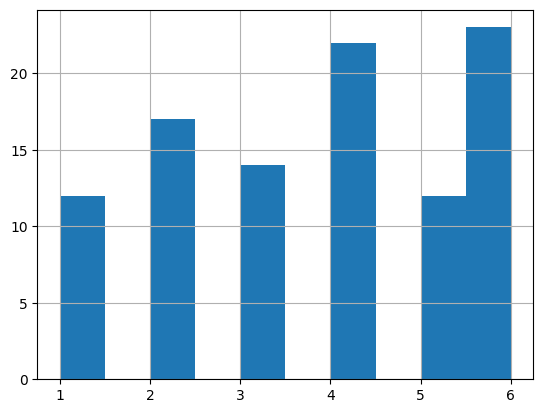

In [85]:
# your code here
dice_hun["value"].hist()

In [86]:
"""
your comments here
the values are almost equally distributed, slightly more frequent are 4 and 6, so it makes sense that the mean is 3.something
"""

'\nyour comments here\nthe values are almost equally distributed, slightly more frequent are 4 and 6, so it makes sense that the mean is 3.something\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

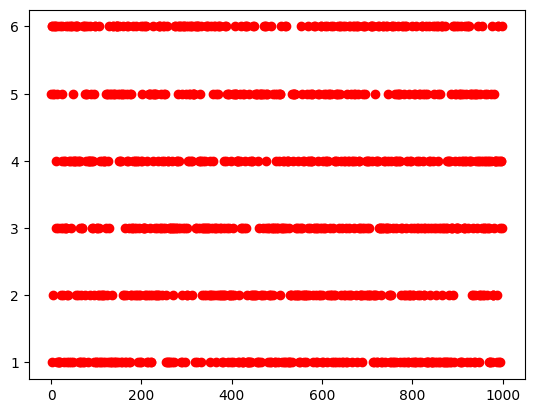

In [90]:
# your code here
thousand = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Ironhack\Labs\Descriptive-Stats\data\roll_the_dice_thousand.csv")
thousand.sort_values(by="value", ascending=True, inplace=True)
plt.plot(thousand["value"], "ro")

In [91]:
"""
your comments here
there are much more results (x100) and therefore the values seems to very equally distributed --> better than before
"""

'\nyour comments here\nthere are much more results (x100) and therefore the values seems to very equally distributed --> better than before\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

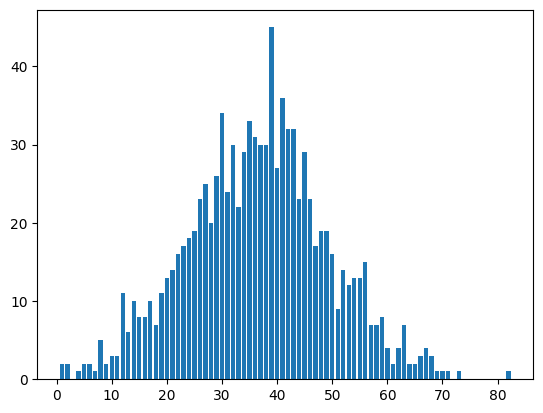

In [104]:
# your code here
ages1 = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Ironhack\Labs\Descriptive-Stats\data\ages_population.csv")

freq = pd.DataFrame(ages1["observation"].value_counts())
freq
freq.index.rename("age",inplace=True)
freq
freq = freq.reset_index()
freq
plt.bar(freq["age"], freq["observation"])
plt.show()

array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

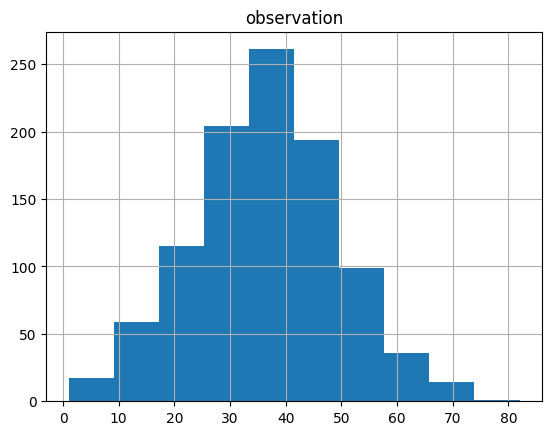

In [105]:
ages1.hist()

In [107]:
# the mean seems to be around 36 and 37, slightly positive skewed, I would guess the std to be around 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [108]:
# your code here
ages1.mean()

observation    36.56
dtype: float64

In [109]:
ages1.std()

observation    12.8165
dtype: float64

In [110]:
"""
your comments here
yes they do fall inside the ranges or where approximated
"""

'\nyour comments here\nyes they do fall inside the ranges or where approximated\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

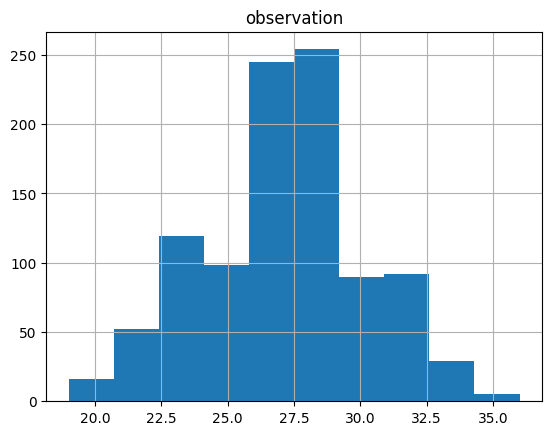

In [113]:
# your code here
ages2 = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Ironhack\Labs\Descriptive-Stats\data\ages_population2.csv")
ages2
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [117]:
"""
your comments here
yes, it's not so equally distributed as before but the age gap is much smaller, very high in the middle compared to rest
"""

"\nyour comments here\nyes, it's not so equally distributed as before but the age gap is much smaller, very high in the middle compared to rest\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [115]:
# your code here
ages2.mean()

observation    27.155
dtype: float64

In [116]:
ages2.std()

observation    2.969814
dtype: float64

In [118]:
"""
your comments here
the mean is lower and the standard deviation is also lower due to smaller age gap
"""

'\nyour comments here\nthe mean is lower and the standard deviation is also lower due to smaller age gap\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

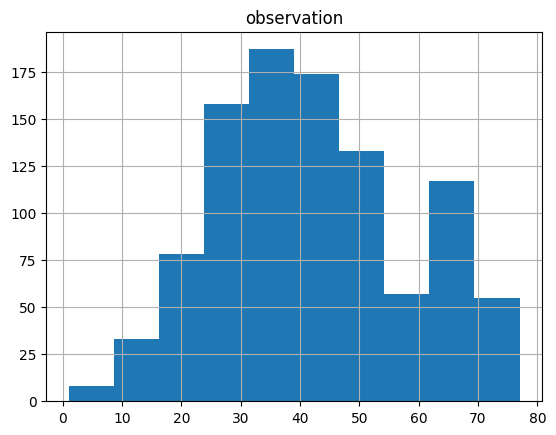

In [119]:
# your code here
ages3 = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Ironhack\Labs\Descriptive-Stats\data\ages_population3.csv")
ages3
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [120]:
# your code here
ages3.mean()

observation    41.989
dtype: float64

In [121]:
ages3.std()

observation    16.144706
dtype: float64

In [124]:
"""
your comments here
there are more older people in the sample and it is positive skewed
"""

'\nyour comments here\nthere are more older people in the sample and it is positive skewed\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [123]:
# your code here
q1 = np.quantile(ages3, 0.25)
print("The first quartile is: ", q1)
q2 = np.quantile(ages3, 0.50)
print("The second quartile is: ",q2)
q3 = np.quantile(ages3, 0.75)
print("The third quartile is: ",q3)

The first quartile is:  30.0
The second quartile is:  40.0
The third quartile is:  53.0


In [125]:
"""
your comments here
median is 40 and the mean is 41.989 > median --> positive skewed
"""

'\nyour comments here\nmedian is 40 and the mean is 41.989 > median --> positive skewed\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [126]:
# your code here
q0 = np.quantile(ages3, 0.15)
print("The first quartile is: ", q0)
q4 = np.quantile(ages3, 0.85)
print("The third quartile is: ",q4)

The first quartile is:  25.0
The third quartile is:  64.0


In [127]:
"""
your comments here
70% of the sample is between 25 and 64 years old
"""

'\nyour comments here\n70% of the sample is between 25 and 64 years old\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""